## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9543058	total: 48.2ms	remaining: 48.2s
1:	learn: 0.9346946	total: 49.2ms	remaining: 24.5s
2:	learn: 0.9145029	total: 50.2ms	remaining: 16.7s
3:	learn: 0.8979172	total: 51.3ms	remaining: 12.8s
4:	learn: 0.8813671	total: 52.4ms	remaining: 10.4s
5:	learn: 0.8662913	total: 53.5ms	remaining: 8.87s
6:	learn: 0.8506072	total: 54.6ms	remaining: 7.74s
7:	learn: 0.8341019	total: 55.5ms	remaining: 6.88s
8:	learn: 0.8189041	total: 56.4ms	remaining: 6.21s
9:	learn: 0.8010561	total: 57.4ms	remaining: 5.69s
10:	learn: 0.7864334	total: 58.4ms	remaining: 5.25s
11:	learn: 0.7705583	total: 59.3ms	remaining: 4.89s
12:	learn: 0.7560385	total: 60.3ms	remaining: 4.58s
13:	learn: 0.7401264	total: 61.3ms	remaining: 4.32s
14:	learn: 0.7266012	total: 62.4ms	remaining: 4.1s
15:	learn: 0.7112433	total: 63.4ms	remaining: 3.9s
16:	learn: 0.6974995	total: 64.6ms	remaining: 3.73s
17:	learn: 0.6844832	total: 65.5ms	remaining: 3.57s
18:	learn: 0.6725661	total: 66.5ms	remaining: 3

92:	learn: 0.3120380	total: 143ms	remaining: 1.4s
93:	learn: 0.3101086	total: 145ms	remaining: 1.39s
94:	learn: 0.3087660	total: 146ms	remaining: 1.39s
95:	learn: 0.3074064	total: 147ms	remaining: 1.38s
96:	learn: 0.3062119	total: 148ms	remaining: 1.38s
97:	learn: 0.3050963	total: 149ms	remaining: 1.37s
98:	learn: 0.3036346	total: 150ms	remaining: 1.37s
99:	learn: 0.3024660	total: 151ms	remaining: 1.36s
100:	learn: 0.3012231	total: 152ms	remaining: 1.36s
101:	learn: 0.2995866	total: 153ms	remaining: 1.35s
102:	learn: 0.2983041	total: 154ms	remaining: 1.34s
103:	learn: 0.2963513	total: 155ms	remaining: 1.34s
104:	learn: 0.2953294	total: 156ms	remaining: 1.33s
105:	learn: 0.2943338	total: 157ms	remaining: 1.33s
106:	learn: 0.2929541	total: 158ms	remaining: 1.32s
107:	learn: 0.2916084	total: 160ms	remaining: 1.32s
108:	learn: 0.2903235	total: 160ms	remaining: 1.31s
109:	learn: 0.2888446	total: 161ms	remaining: 1.31s
110:	learn: 0.2879206	total: 162ms	remaining: 1.3s
111:	learn: 0.2867093	

223:	learn: 0.2080150	total: 279ms	remaining: 968ms
224:	learn: 0.2078350	total: 281ms	remaining: 967ms
225:	learn: 0.2071489	total: 282ms	remaining: 965ms
226:	learn: 0.2069612	total: 283ms	remaining: 963ms
227:	learn: 0.2064632	total: 284ms	remaining: 961ms
228:	learn: 0.2061950	total: 285ms	remaining: 961ms
229:	learn: 0.2055482	total: 287ms	remaining: 959ms
230:	learn: 0.2053763	total: 287ms	remaining: 957ms
231:	learn: 0.2047452	total: 288ms	remaining: 955ms
232:	learn: 0.2043103	total: 290ms	remaining: 953ms
233:	learn: 0.2035069	total: 290ms	remaining: 951ms
234:	learn: 0.2031463	total: 291ms	remaining: 948ms
235:	learn: 0.2025025	total: 292ms	remaining: 947ms
236:	learn: 0.2023414	total: 293ms	remaining: 945ms
237:	learn: 0.2022035	total: 294ms	remaining: 942ms
238:	learn: 0.2018931	total: 295ms	remaining: 940ms
239:	learn: 0.2011334	total: 296ms	remaining: 938ms
240:	learn: 0.2008959	total: 297ms	remaining: 936ms
241:	learn: 0.2003079	total: 298ms	remaining: 934ms
242:	learn: 

355:	learn: 0.1579142	total: 413ms	remaining: 748ms
356:	learn: 0.1575608	total: 415ms	remaining: 747ms
357:	learn: 0.1573324	total: 416ms	remaining: 746ms
358:	learn: 0.1568063	total: 417ms	remaining: 744ms
359:	learn: 0.1565919	total: 418ms	remaining: 743ms
360:	learn: 0.1562702	total: 419ms	remaining: 742ms
361:	learn: 0.1559591	total: 420ms	remaining: 740ms
362:	learn: 0.1558961	total: 421ms	remaining: 739ms
363:	learn: 0.1557608	total: 422ms	remaining: 738ms
364:	learn: 0.1557236	total: 423ms	remaining: 737ms
365:	learn: 0.1552400	total: 424ms	remaining: 735ms
366:	learn: 0.1551809	total: 426ms	remaining: 734ms
367:	learn: 0.1548633	total: 427ms	remaining: 733ms
368:	learn: 0.1547283	total: 430ms	remaining: 736ms
369:	learn: 0.1543402	total: 432ms	remaining: 735ms
370:	learn: 0.1539791	total: 433ms	remaining: 734ms
371:	learn: 0.1537895	total: 434ms	remaining: 733ms
372:	learn: 0.1535403	total: 435ms	remaining: 732ms
373:	learn: 0.1530829	total: 436ms	remaining: 730ms
374:	learn: 

475:	learn: 0.1243212	total: 543ms	remaining: 598ms
476:	learn: 0.1241007	total: 545ms	remaining: 597ms
477:	learn: 0.1236898	total: 546ms	remaining: 596ms
478:	learn: 0.1234518	total: 547ms	remaining: 595ms
479:	learn: 0.1231576	total: 548ms	remaining: 593ms
480:	learn: 0.1228662	total: 549ms	remaining: 592ms
481:	learn: 0.1225617	total: 550ms	remaining: 591ms
482:	learn: 0.1223071	total: 551ms	remaining: 590ms
483:	learn: 0.1221232	total: 552ms	remaining: 589ms
484:	learn: 0.1219458	total: 553ms	remaining: 587ms
485:	learn: 0.1217484	total: 554ms	remaining: 586ms
486:	learn: 0.1213098	total: 555ms	remaining: 585ms
487:	learn: 0.1210349	total: 557ms	remaining: 584ms
488:	learn: 0.1208126	total: 558ms	remaining: 583ms
489:	learn: 0.1204788	total: 559ms	remaining: 581ms
490:	learn: 0.1201006	total: 560ms	remaining: 580ms
491:	learn: 0.1198501	total: 561ms	remaining: 579ms
492:	learn: 0.1196047	total: 562ms	remaining: 578ms
493:	learn: 0.1194214	total: 563ms	remaining: 577ms
494:	learn: 

605:	learn: 0.0975444	total: 678ms	remaining: 441ms
606:	learn: 0.0973639	total: 679ms	remaining: 440ms
607:	learn: 0.0972473	total: 680ms	remaining: 439ms
608:	learn: 0.0970581	total: 681ms	remaining: 437ms
609:	learn: 0.0969236	total: 682ms	remaining: 436ms
610:	learn: 0.0968908	total: 683ms	remaining: 435ms
611:	learn: 0.0968419	total: 684ms	remaining: 433ms
612:	learn: 0.0967062	total: 685ms	remaining: 432ms
613:	learn: 0.0965110	total: 686ms	remaining: 431ms
614:	learn: 0.0963623	total: 687ms	remaining: 430ms
615:	learn: 0.0961344	total: 688ms	remaining: 429ms
616:	learn: 0.0959643	total: 689ms	remaining: 428ms
617:	learn: 0.0958657	total: 690ms	remaining: 426ms
618:	learn: 0.0956835	total: 691ms	remaining: 425ms
619:	learn: 0.0956595	total: 692ms	remaining: 424ms
620:	learn: 0.0956379	total: 693ms	remaining: 423ms
621:	learn: 0.0956206	total: 694ms	remaining: 422ms
622:	learn: 0.0955996	total: 695ms	remaining: 421ms
623:	learn: 0.0954192	total: 696ms	remaining: 419ms
624:	learn: 

740:	learn: 0.0810151	total: 814ms	remaining: 285ms
741:	learn: 0.0809706	total: 816ms	remaining: 284ms
742:	learn: 0.0808979	total: 817ms	remaining: 283ms
743:	learn: 0.0807806	total: 818ms	remaining: 281ms
744:	learn: 0.0806766	total: 819ms	remaining: 280ms
745:	learn: 0.0806522	total: 820ms	remaining: 279ms
746:	learn: 0.0804284	total: 821ms	remaining: 278ms
747:	learn: 0.0803195	total: 822ms	remaining: 277ms
748:	learn: 0.0802395	total: 823ms	remaining: 276ms
749:	learn: 0.0800682	total: 824ms	remaining: 275ms
750:	learn: 0.0800361	total: 825ms	remaining: 274ms
751:	learn: 0.0798639	total: 826ms	remaining: 273ms
752:	learn: 0.0797343	total: 827ms	remaining: 271ms
753:	learn: 0.0796703	total: 828ms	remaining: 270ms
754:	learn: 0.0795653	total: 830ms	remaining: 269ms
755:	learn: 0.0793917	total: 831ms	remaining: 268ms
756:	learn: 0.0793827	total: 831ms	remaining: 267ms
757:	learn: 0.0791508	total: 833ms	remaining: 266ms
758:	learn: 0.0790117	total: 834ms	remaining: 265ms
759:	learn: 

876:	learn: 0.0667577	total: 952ms	remaining: 134ms
877:	learn: 0.0666170	total: 954ms	remaining: 133ms
878:	learn: 0.0664404	total: 954ms	remaining: 131ms
879:	learn: 0.0662797	total: 955ms	remaining: 130ms
880:	learn: 0.0662693	total: 956ms	remaining: 129ms
881:	learn: 0.0661941	total: 958ms	remaining: 128ms
882:	learn: 0.0659777	total: 959ms	remaining: 127ms
883:	learn: 0.0658695	total: 960ms	remaining: 126ms
884:	learn: 0.0657571	total: 961ms	remaining: 125ms
885:	learn: 0.0656282	total: 962ms	remaining: 124ms
886:	learn: 0.0655654	total: 963ms	remaining: 123ms
887:	learn: 0.0653683	total: 964ms	remaining: 122ms
888:	learn: 0.0652185	total: 965ms	remaining: 120ms
889:	learn: 0.0651485	total: 966ms	remaining: 119ms
890:	learn: 0.0650701	total: 967ms	remaining: 118ms
891:	learn: 0.0649224	total: 968ms	remaining: 117ms
892:	learn: 0.0648317	total: 969ms	remaining: 116ms
893:	learn: 0.0647681	total: 970ms	remaining: 115ms
894:	learn: 0.0647339	total: 970ms	remaining: 114ms
895:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

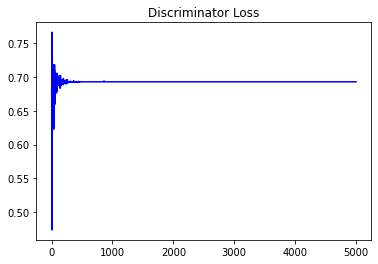

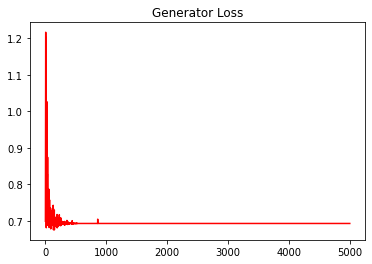

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

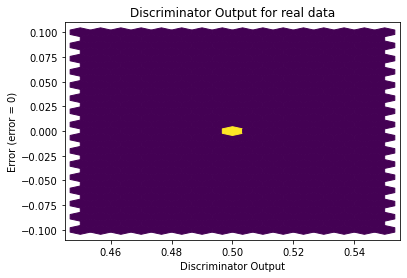

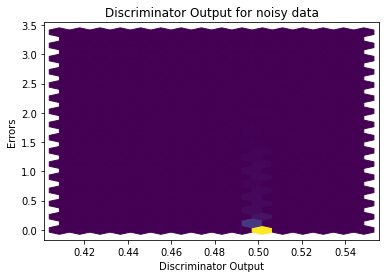

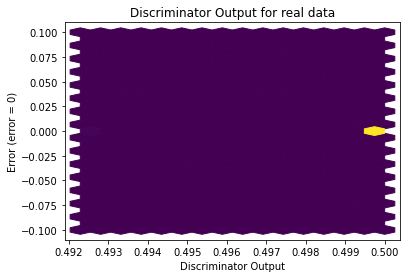

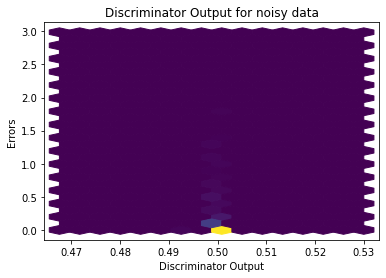

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


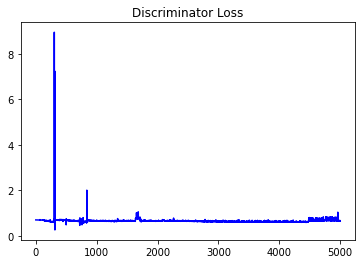

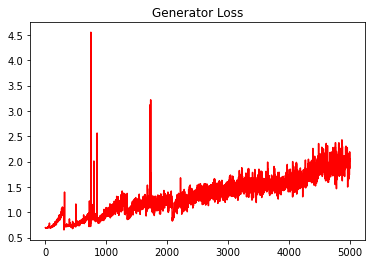

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

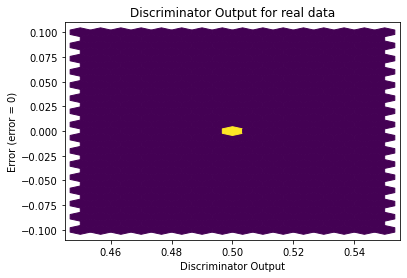

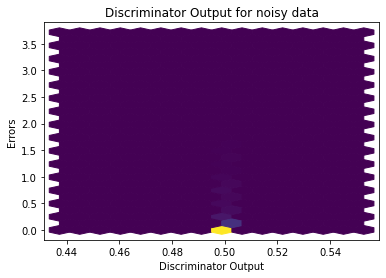

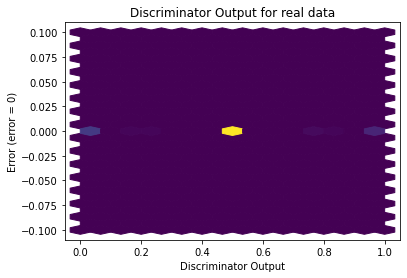

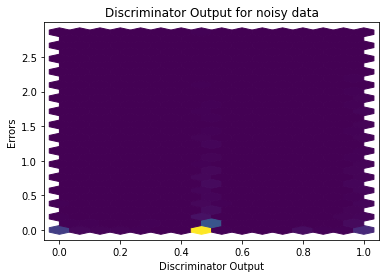

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
